In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/AI/Face

/content/drive/MyDrive/AI/Face


In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Face/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 149 images belonging to 3 classes.


In [6]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Face/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 29 images belonging to 3 classes.


In [31]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [32]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=10,batch_size=256,verbose=1, validation_data=validation)

Epoch 1/10
5/5 [==============================] - 38s 7s/step - loss: 13.5861 - accuracy: 0.2617 - val_loss: 1.1371 - val_accuracy: 0.3103
Epoch 2/10
5/5 [==============================] - 35s 7s/step - loss: 1.0794 - accuracy: 0.4362 - val_loss: 0.9500 - val_accuracy: 0.6552
Epoch 3/10
5/5 [==============================] - 33s 7s/step - loss: 0.7948 - accuracy: 0.6980 - val_loss: 0.6739 - val_accuracy: 0.6897
Epoch 4/10
5/5 [==============================] - 39s 7s/step - loss: 0.7922 - accuracy: 0.7315 - val_loss: 0.4098 - val_accuracy: 0.8966
Epoch 5/10
5/5 [==============================] - 36s 7s/step - loss: 0.3081 - accuracy: 0.9262 - val_loss: 0.0688 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 33s 6s/step - loss: 0.1271 - accuracy: 0.9530 - val_loss: 0.1477 - val_accuracy: 0.9655
Epoch 7/10
5/5 [==============================] - 34s 7s/step - loss: 0.0472 - accuracy: 0.9866 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 8/10
5/5 [=================

In [33]:
# Lưu 
model.save("Face_VN.h5")
model_1=load_model('Face_VN.h5')

In [34]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.12453632056713104
Train Accuracy 0.9664429426193237


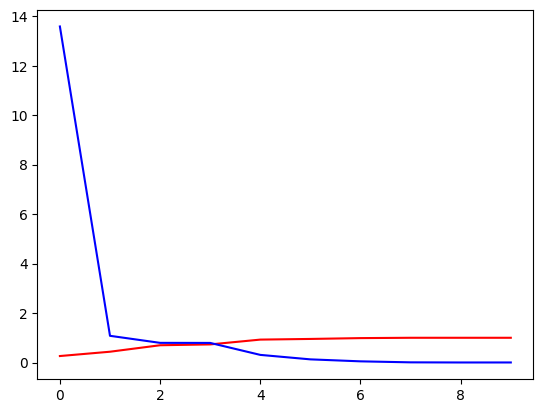

In [35]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 177ms/step
Thinh


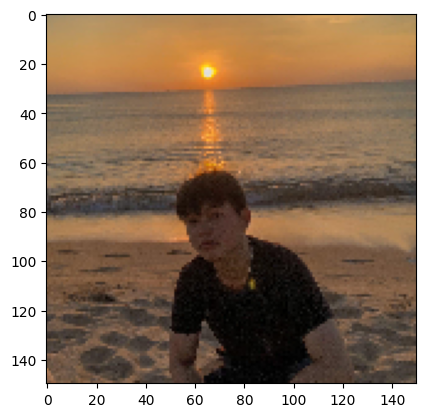

1/1 [==============================] - 0s 69ms/step
Thuan


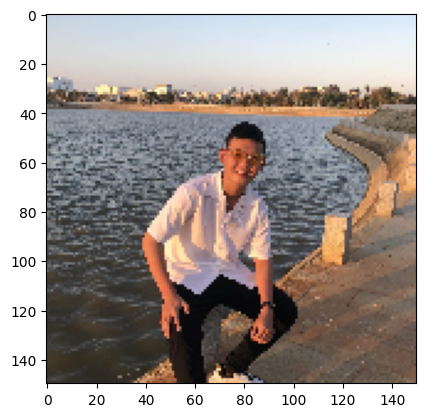

1/1 [==============================] - 0s 68ms/step
Thuan


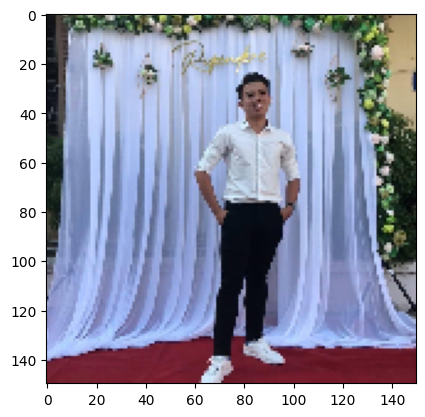

1/1 [==============================] - 0s 69ms/step
Tien


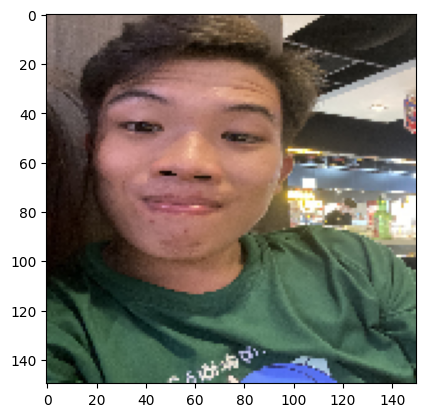

1/1 [==============================] - 0s 70ms/step
Thuan


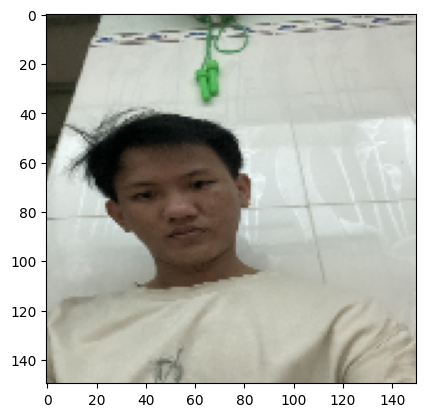

1/1 [==============================] - 0s 75ms/step
Thuan


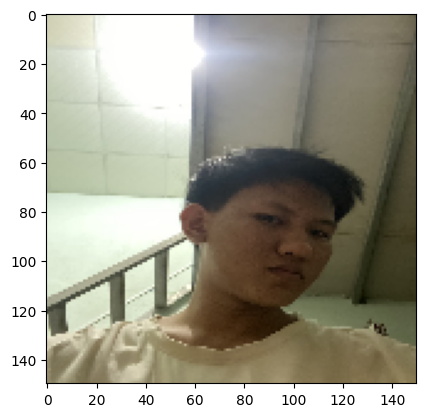

In [36]:
test="/content/drive/MyDrive/AI/Face/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Thuan','Thinh','Tien']
  print(class_name[result])
  plt.show()